## Drug Screening Panels Data Analysis

Import required packages and classes

In [1]:
import pharmacoset
import importlib
import utils
import calculations
import myPlots



In [2]:
importlib.reload(pharmacoset) 
importlib.reload(utils)
importlib.reload(myPlots)

from pharmacoset import PharmacoSet
from utils import Tools, DrugAnalysis
from calculations import Correlation
from myPlots import Plotting

### Create PharmacoSets
PharmacoSet class is defined in data.py file.

In [3]:
gdsc_path = "../processed_data/gdsc2_normalized_mapped.tsv"
ccle_path = "../processed_data/ccle_normalized_mapped.tsv"

gdsc = PharmacoSet(filepath= gdsc_path, name= "gdsc2")
ccle = PharmacoSet(filepath= ccle_path, name= "ccle")

gdsc.data.head()


,cell_line,drug,dose,response,dataset
0,CVCL_1045,123138,0.000000,1.0,gdsc2
1,CVCL_1045,123138,0.001001,1.0,gdsc2
2,CVCL_1045,123138,0.003164,1.0,gdsc2
3,CVCL_1045,123138,0.010004,1.0,gdsc2
4,CVCL_1045,123138,0.031631,1.0,gdsc2


Find and filter overlapping cell line - drug pairs.
After using filter_common_pairs method, filtered data can be accessed from PharmacoSet object by '.overlapping_data' accessor. 

In [4]:
common_pairs = Tools.find_common_pairs(gdsc, ccle)
common_pairs

{Pandas(cell_line='CVCL_3004', drug='palbociclib'),
 Pandas(cell_line='CVCL_0152', drug='topotecan'),
 Pandas(cell_line='CVCL_1405', drug='sorafenib'),
 Pandas(cell_line='CVCL_1139', drug='nutlin-3'),
 Pandas(cell_line='CVCL_0178', drug='palbociclib'),
 Pandas(cell_line='CVCL_1386', drug='nutlin-3'),
 Pandas(cell_line='CVCL_1710', drug='paclitaxel'),
 Pandas(cell_line='CVCL_1411', drug='palbociclib'),
 Pandas(cell_line='CVCL_1335', drug='plx-4720'),
 Pandas(cell_line='CVCL_0359', drug='plx-4720'),
 Pandas(cell_line='CVCL_1279', drug='topotecan'),
 Pandas(cell_line='CVCL_0471', drug='sorafenib'),
 Pandas(cell_line='CVCL_1639', drug='nutlin-3'),
 Pandas(cell_line='CVCL_3152', drug='palbociclib'),
 Pandas(cell_line='CVCL_1650', drug='nilotinib'),
 Pandas(cell_line='CVCL_3007', drug='nutlin-3'),
 Pandas(cell_line='CVCL_1714', drug='plx-4720'),
 Pandas(cell_line='CVCL_0333', drug='nutlin-3'),
 Pandas(cell_line='CVCL_0026', drug='crizotinib'),
 Pandas(cell_line='CVCL_1320', drug='paclitaxel'

In [5]:
import pandas as pd
pd.DataFrame(list(common_pairs))

,cell_line,drug
0,CVCL_3004,palbociclib
1,CVCL_0152,topotecan
2,CVCL_1405,sorafenib
3,CVCL_1139,nutlin-3
4,CVCL_0178,palbociclib
...,...,...
4130,CVCL_3612,erlotinib
4131,CVCL_0332,selumetinib
4132,CVCL_0366,crizotinib
4133,CVCL_0036,palbociclib


In [6]:
gdsc.filter_common_pairs(common_pairs)
ccle.filter_common_pairs(common_pairs)

Find common concetration range of the overlapping data.

In [7]:
common_conc = Tools.common_concentration_ranges(gdsc.overlapping_data, ccle.overlapping_data)
common_conc.head()


common_conc[common_conc['drug_'] == "paclitaxel"]

,cell_line_,drug_,common_min_dose,common_max_dose
6,cvcl_0012,paclitaxel,0.0025,0.10
19,cvcl_0022,paclitaxel,0.0025,0.01
31,cvcl_0023,paclitaxel,0.0025,0.01
43,cvcl_0026,paclitaxel,0.0025,0.10
54,cvcl_0028,paclitaxel,0.0025,0.01
...,...,...,...,...
4081,cvcl_4649,paclitaxel,0.0025,0.10
4093,cvcl_6774,paclitaxel,0.0025,0.10
4105,cvcl_6831,paclitaxel,0.0025,0.10
4117,cvcl_6c19,paclitaxel,0.0025,0.01


Compute AUC between shared concentration range for all drugs across all cell lines for both CCLE and GDSC2.

In [8]:

all_drug_ccle = ccle.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)
all_drug_gdsc = gdsc.get_recomp_auc_values(common_conc, p_filter= 0.05, log_fc= -0.5)

ccle.recomp_Aucs.head()


,drug,cvcl_0023,cvcl_0026,cvcl_0039,cvcl_0040,cvcl_0060,cvcl_0069,cvcl_0077,cvcl_0099,cvcl_0126,...,cvcl_1702,cvcl_1714,cvcl_1764,cvcl_2060,cvcl_2092,cvcl_2613,cvcl_2961,cvcl_3007,cvcl_3881,cvcl_4647
0,selumetinib,0.265645,0.283931,0.515655,0.220516,0.213269,0.191445,0.154211,0.295814,0.062349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,erlotinib,0.030517,NaN,NaN,0.002785,0.053514,NaN,NaN,NaN,0.114195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,irinotecan,0.407823,0.256881,0.258169,NaN,NaN,0.285969,NaN,NaN,0.600389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lapatinib,0.144827,NaN,NaN,NaN,NaN,NaN,NaN,0.061880,0.199385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nilotinib,0.004687,0.000057,0.067482,NaN,NaN,NaN,NaN,0.012599,0.000060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ccle.get_pub_AUC_values()['drug'].unique()

array(['selumetinib', 'erlotinib', 'irinotecan', 'lapatinib', 'nilotinib',
       'nutlin-3', 'paclitaxel', 'pd0325901', 'palbociclib', 'crizotinib',
       'plx-4720', 'sorafenib', 'topotecan'], dtype=object)

Plot the distribution of AUC values of Published and Recomputed for a given dataset. 
CCLE below

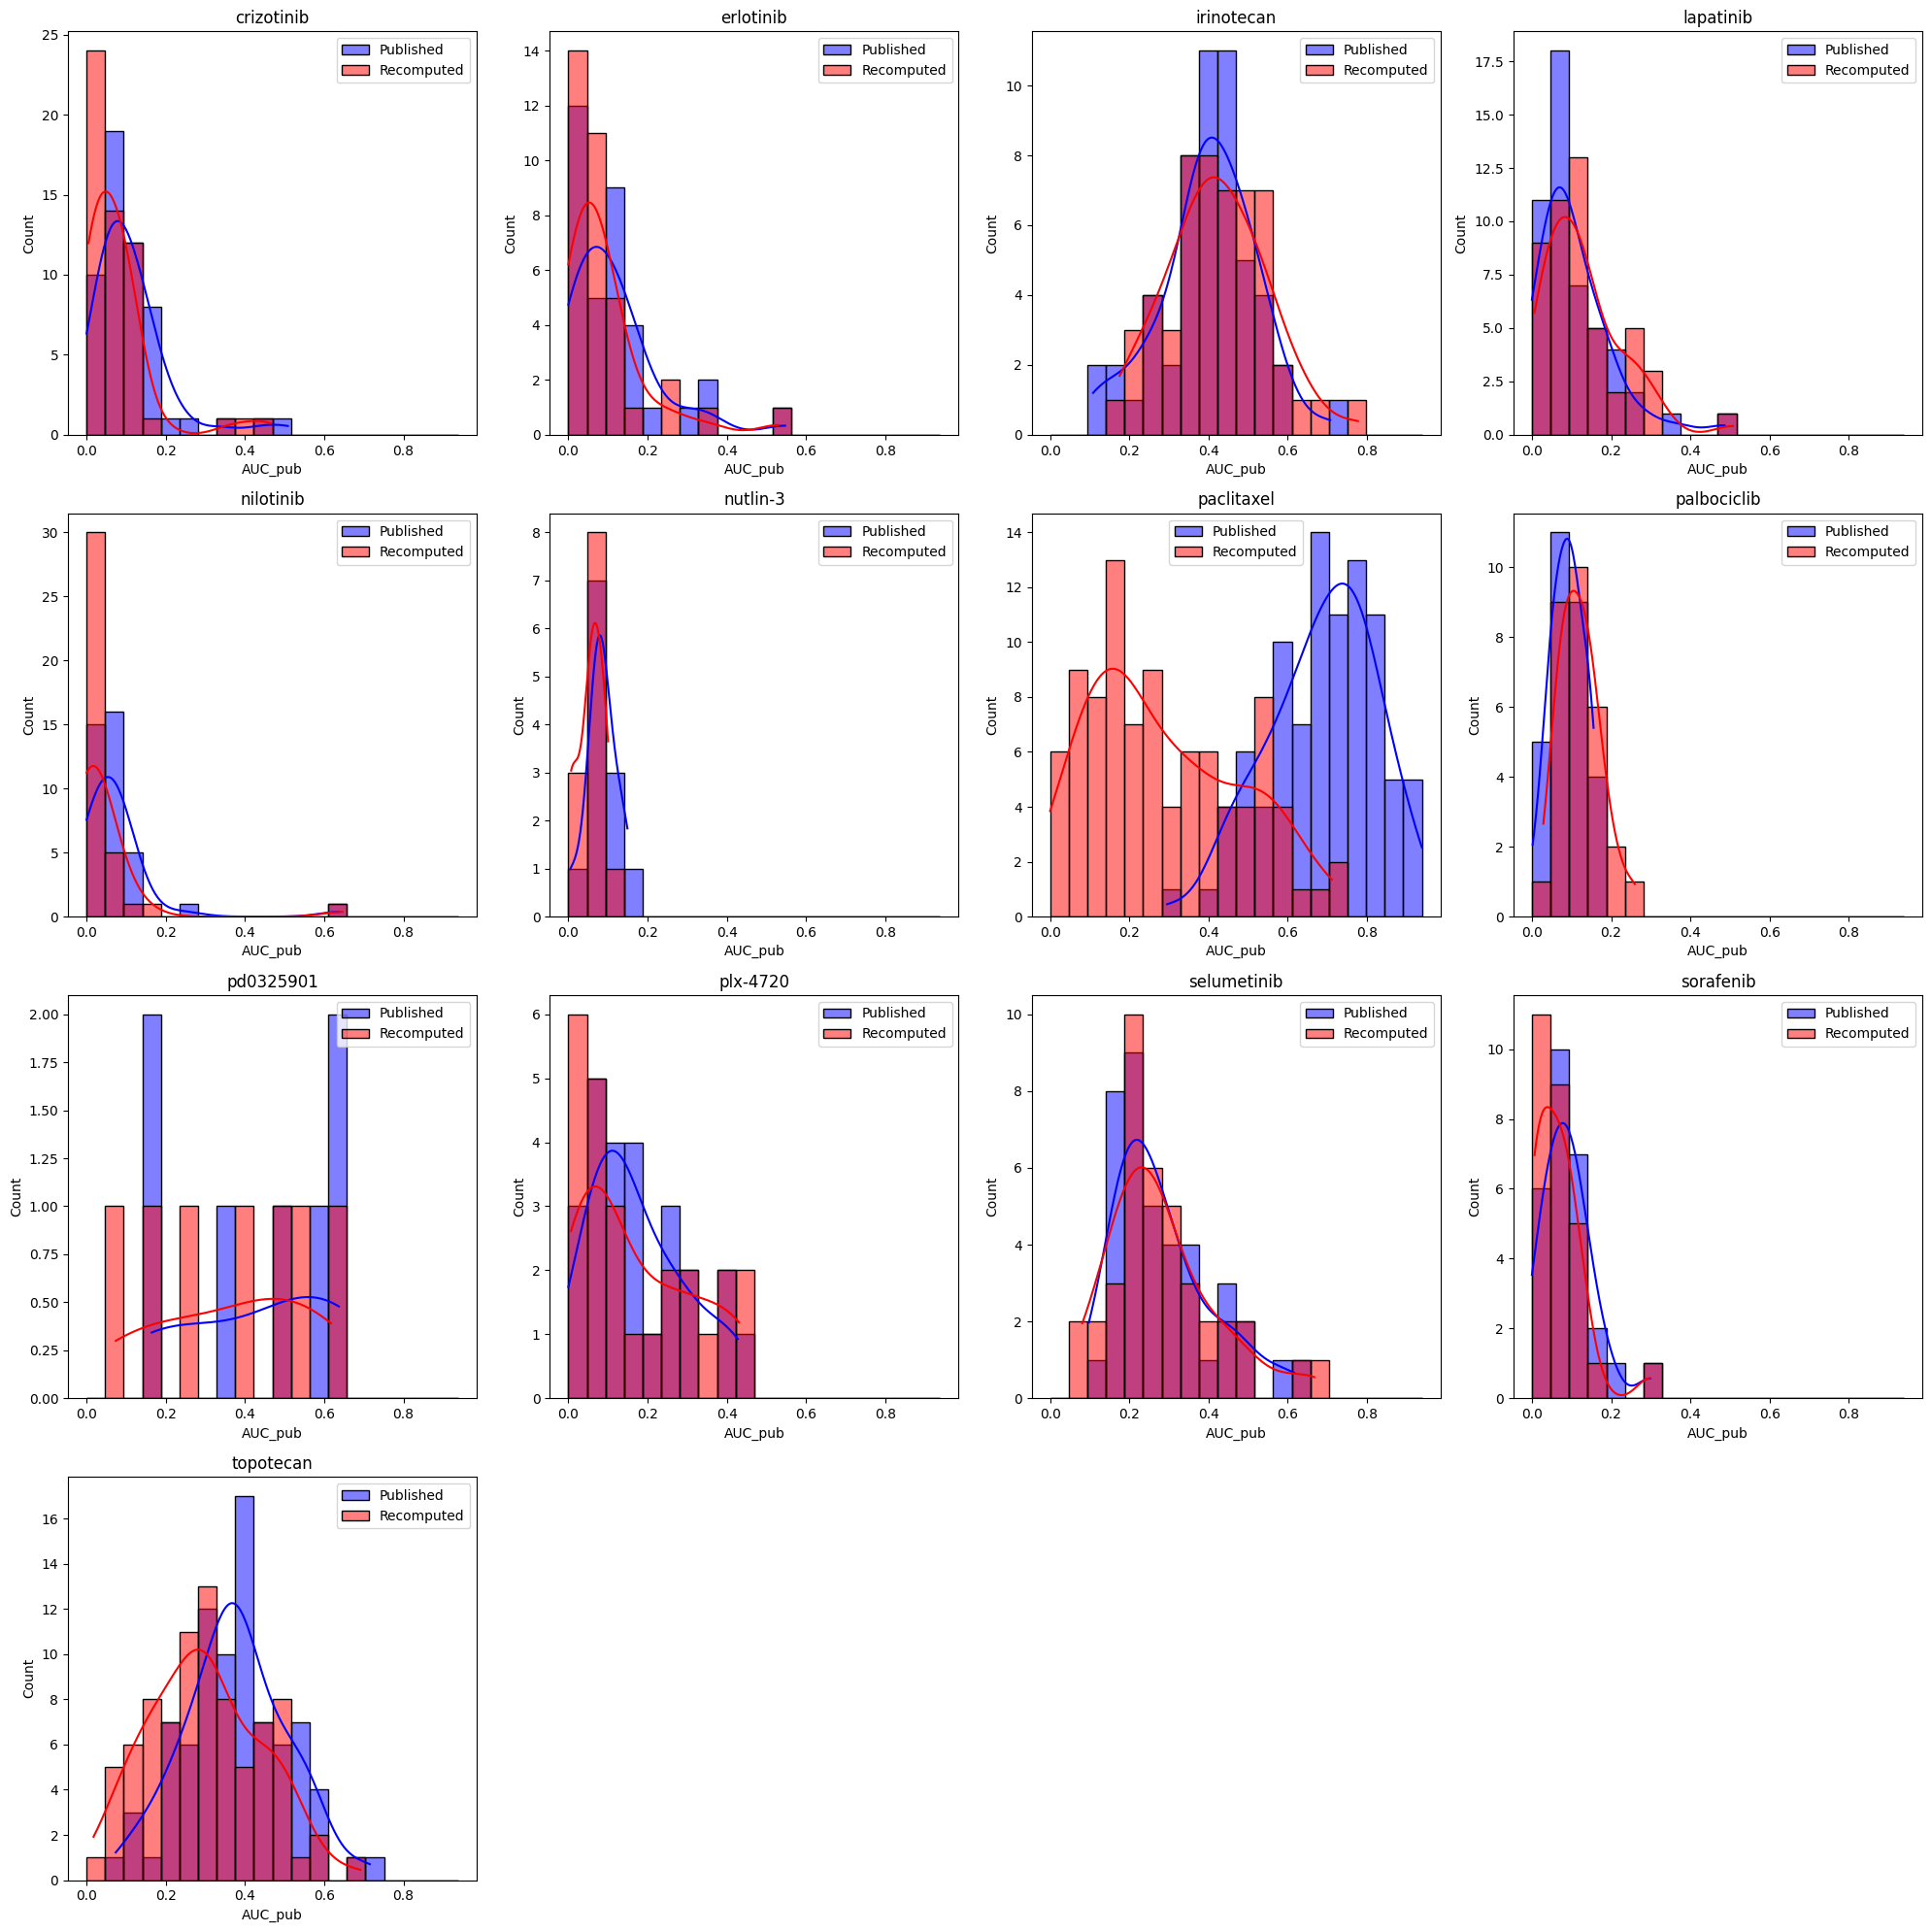

In [10]:
Plotting.plot_AUC_dist_pub_vs_recomp(ccle)

Plot the distribution of AUC values of Published and Recomputed for a given dataset. GDSC below.

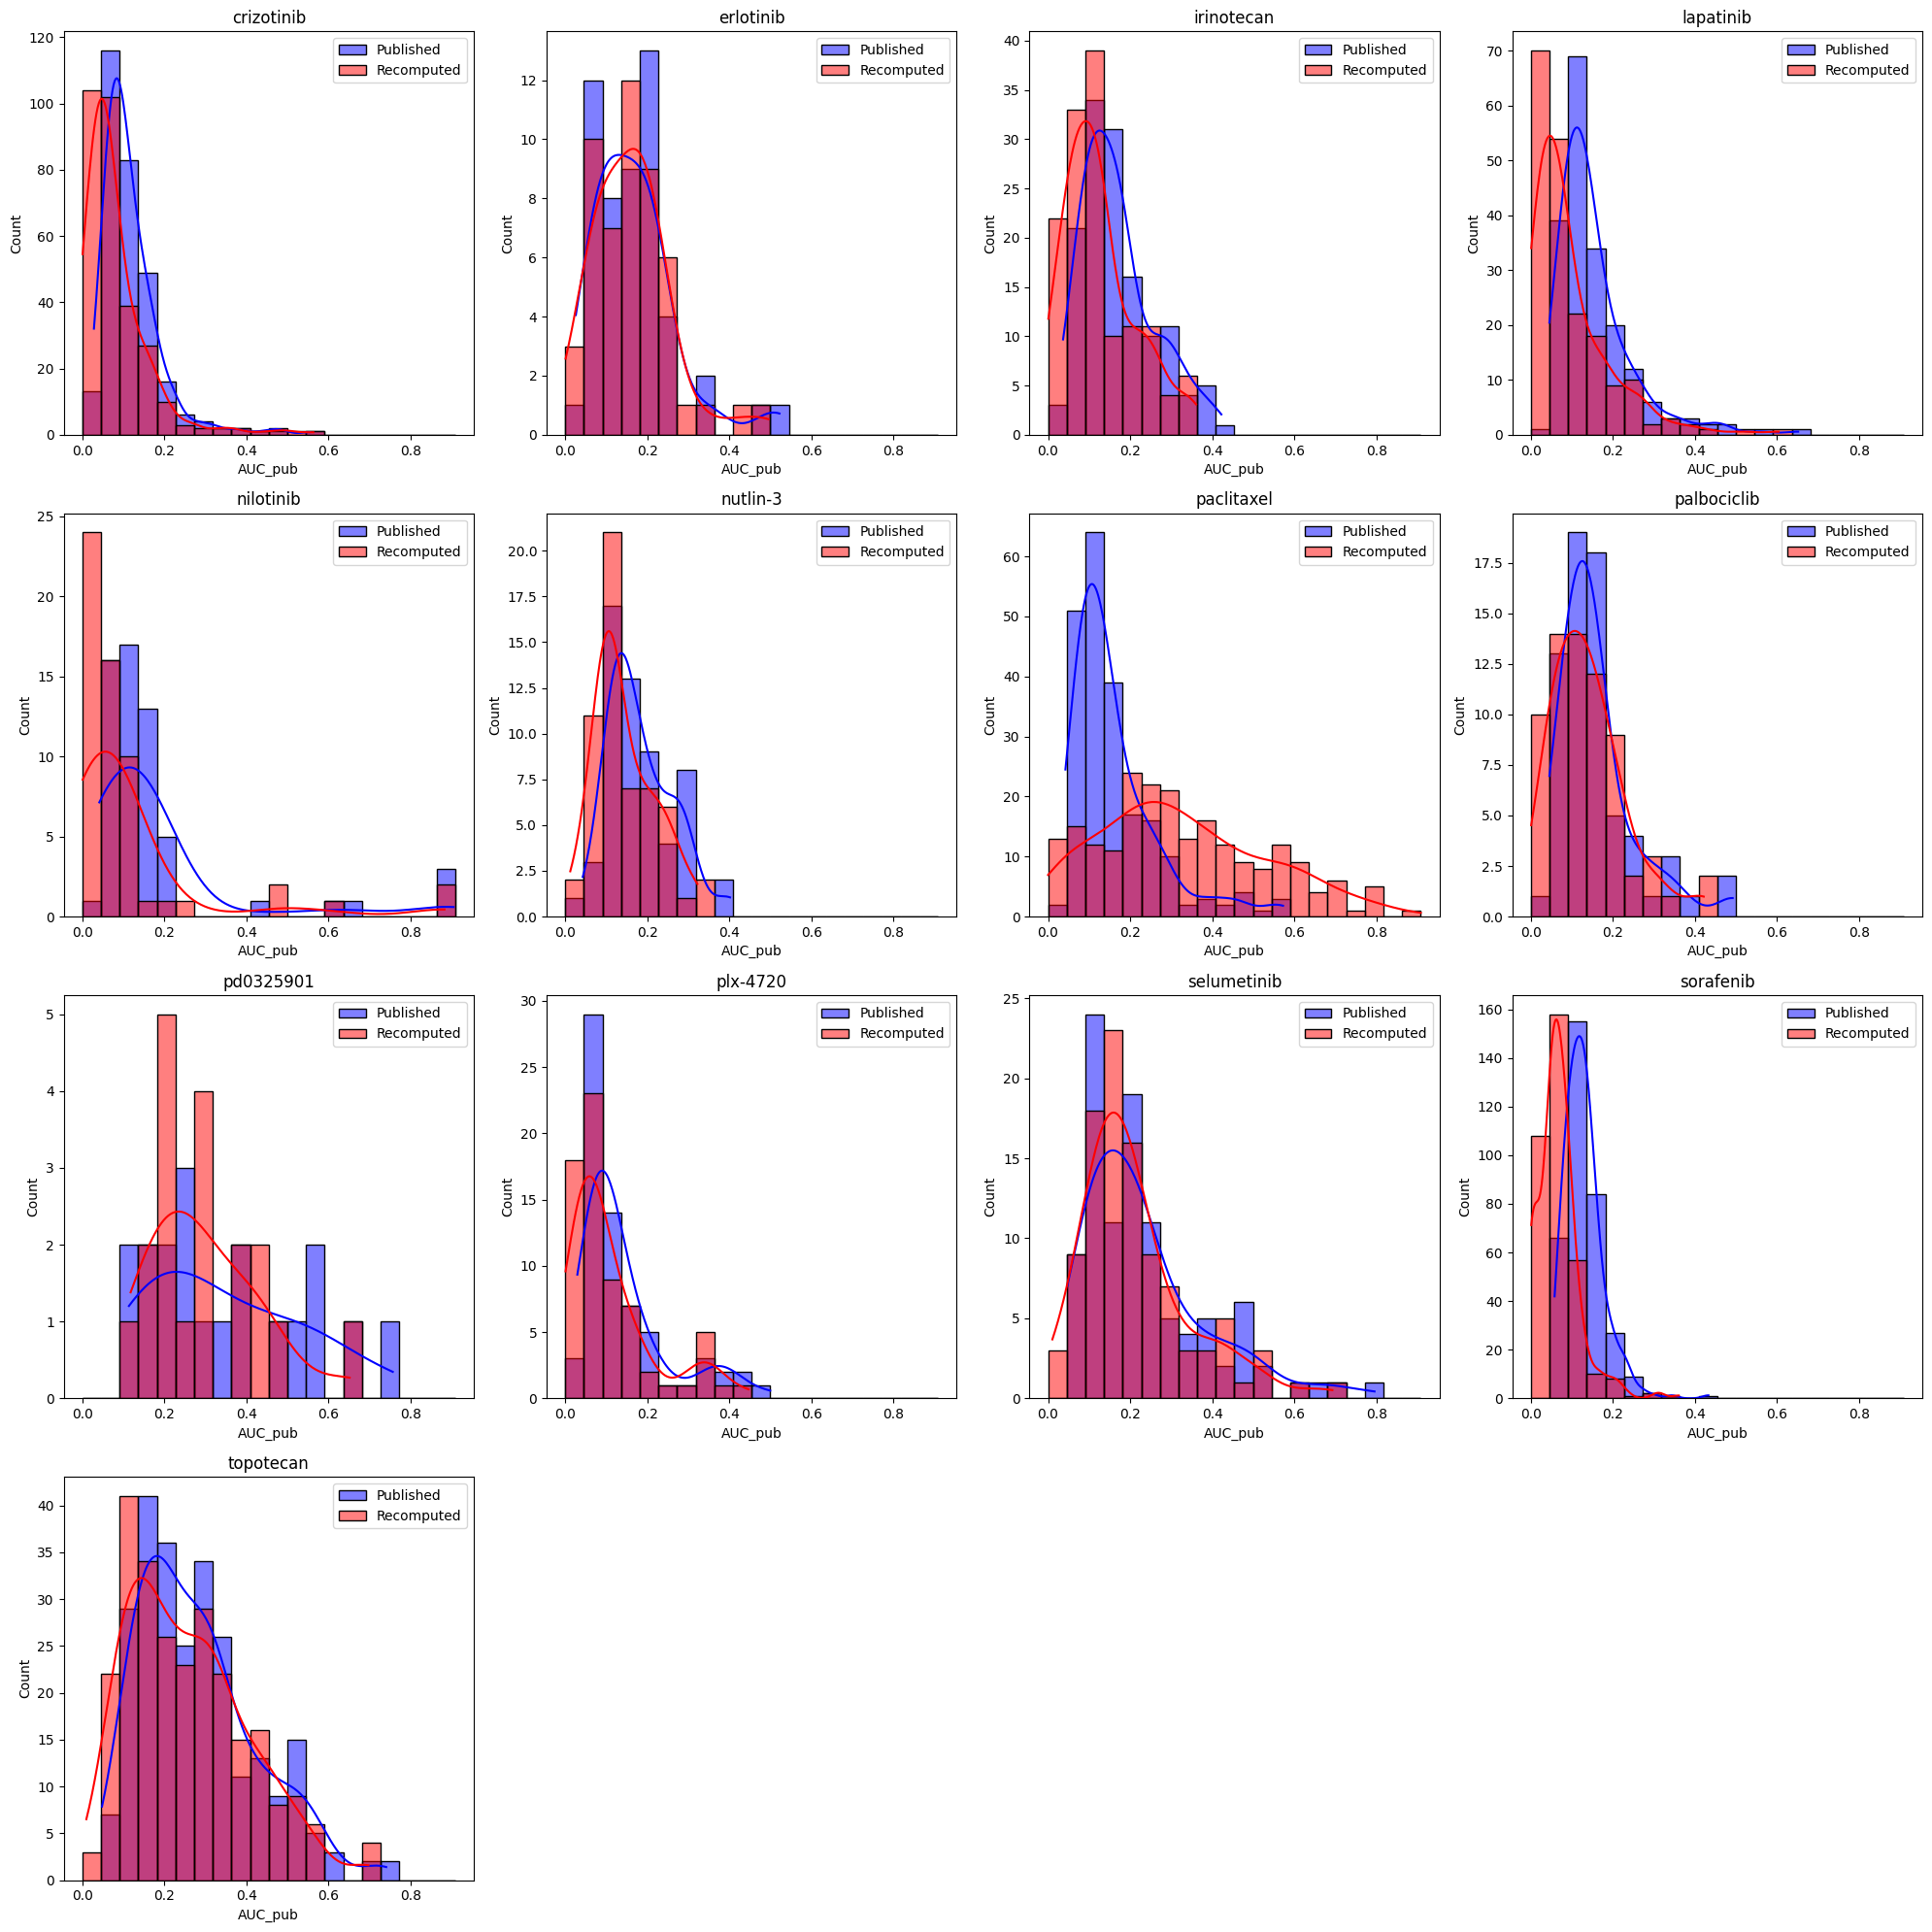

In [11]:
Plotting.plot_AUC_dist_pub_vs_recomp(gdsc)

Correlation between Published AUC values of GDSC2 and CCLE for a given drug, plot for Lapatinib

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


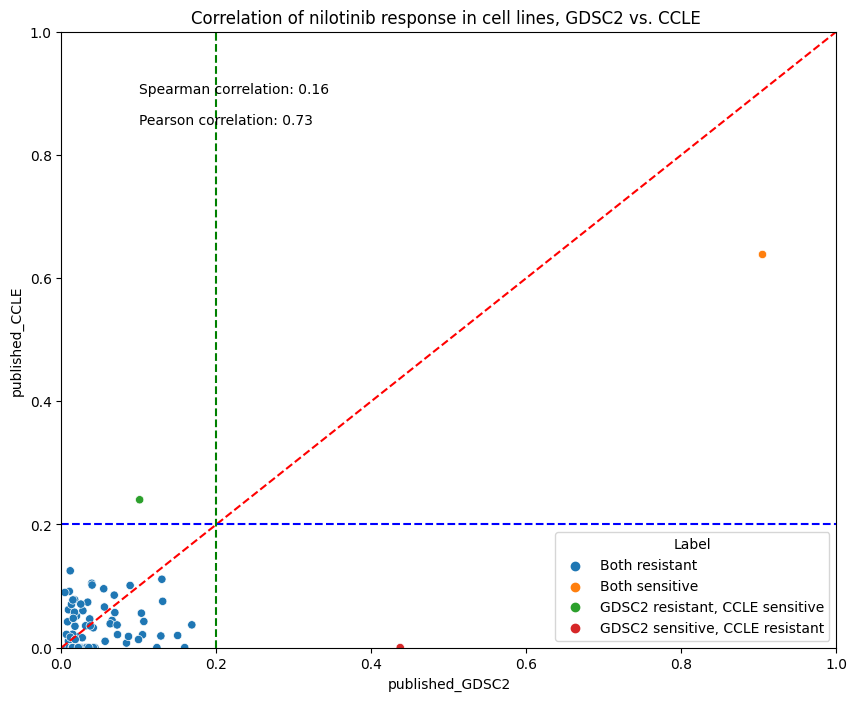

In [12]:
Plotting.correlation_plot(gdsc, ccle, "nilotinib", method= 'published')

Correlation between Recomputed AUC values. Curves were fitted by CurveCurator, AUC is calculated between shared range of GDSC2 and CCLE. Plot for Lapatinib

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


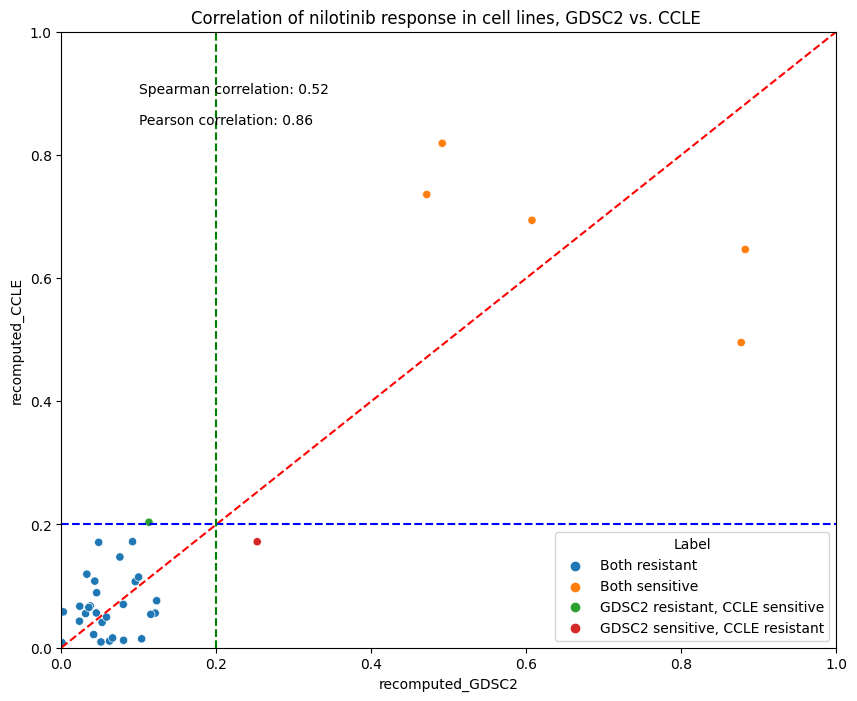

In [13]:
Plotting.correlation_plot(gdsc, ccle, "nilotinib", method= 'recomputed')

Create Spearman's correlation coefficient table for Published and Recomputed values. 

In [14]:

result = Correlation.recomp_vs_pub_corr_table(ccle, gdsc, "spearman")
result

,drug,pub_corr,recomp_corr,pub_size,recomp_size,p-value
0,selumetinib,0.673984,0.722097,98,82,0.536986
1,erlotinib,0.369209,0.634249,97,43,0.055851
2,irinotecan,0.683540,0.684848,54,136,0.988091
3,lapatinib,0.459762,0.705202,98,122,0.005674
4,nilotinib,0.161850,0.523810,78,35,0.047588
5,nutlin-3,0.334840,0.626419,98,18,0.163397
6,paclitaxel,0.448946,0.479298,98,204,0.755967
7,pd0325901,0.829573,0.634675,98,18,0.115283
8,palbociclib,0.335628,0.696623,85,40,0.009795
9,crizotinib,0.271352,0.442130,98,174,0.124532


Barplot to compare Spearman's correlation coefficients 

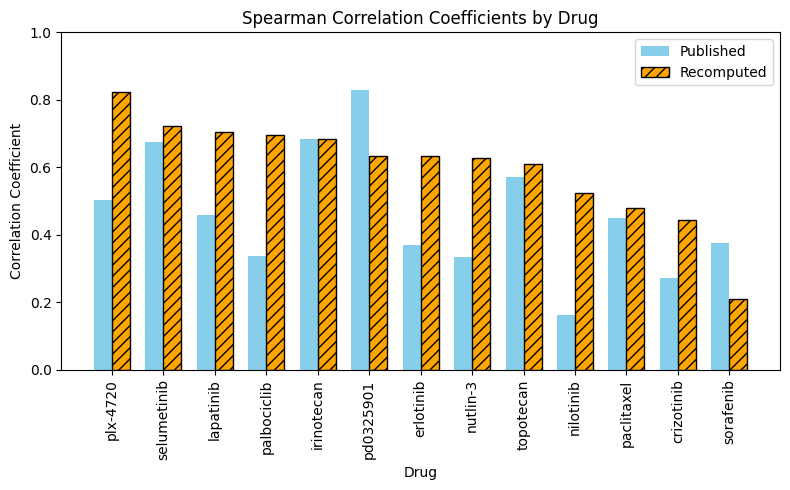

In [15]:
Plotting.barplot_corr_table(result, "Spearman")

Create Pearson's correlation table for Published vs Recomputed AUC values

In [16]:
res_pearson = Correlation.recomp_vs_pub_corr_table(ccle, gdsc, "pearson")
res_pearson

,drug,pub_corr,recomp_corr,pub_size,recomp_size,p-value
0,selumetinib,0.713667,0.795757,98,82,0.206571
1,erlotinib,0.777750,0.761445,97,43,0.832178
2,irinotecan,0.684417,0.701341,54,136,0.843297
3,lapatinib,0.686769,0.750333,98,122,0.337710
4,nilotinib,0.733883,0.862245,78,35,0.083924
5,nutlin-3,0.331435,0.576617,98,18,0.260020
6,paclitaxel,0.400062,0.520410,98,204,0.218583
7,pd0325901,0.807156,0.597087,98,18,0.121521
8,palbociclib,0.275737,0.704677,85,40,0.002730
9,crizotinib,0.670302,0.713665,98,174,0.514942


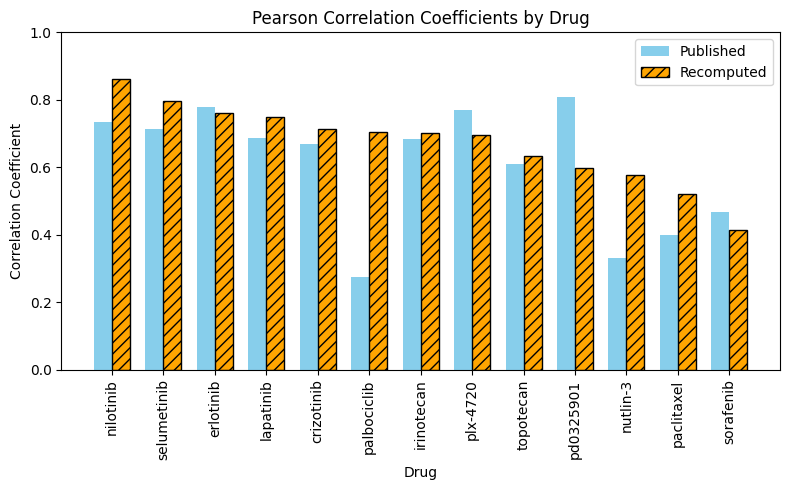

In [17]:
Plotting.barplot_corr_table(res_pearson, "Pearson")

## In-depth look at variance across AUC values 

In [18]:
importlib.reload(pharmacoset) 
importlib.reload(utils)
importlib.reload(myPlots)

from pharmacoset import PharmacoSet
from utils import Tools, DrugAnalysis
from calculations import Correlation
from myPlots import Plotting

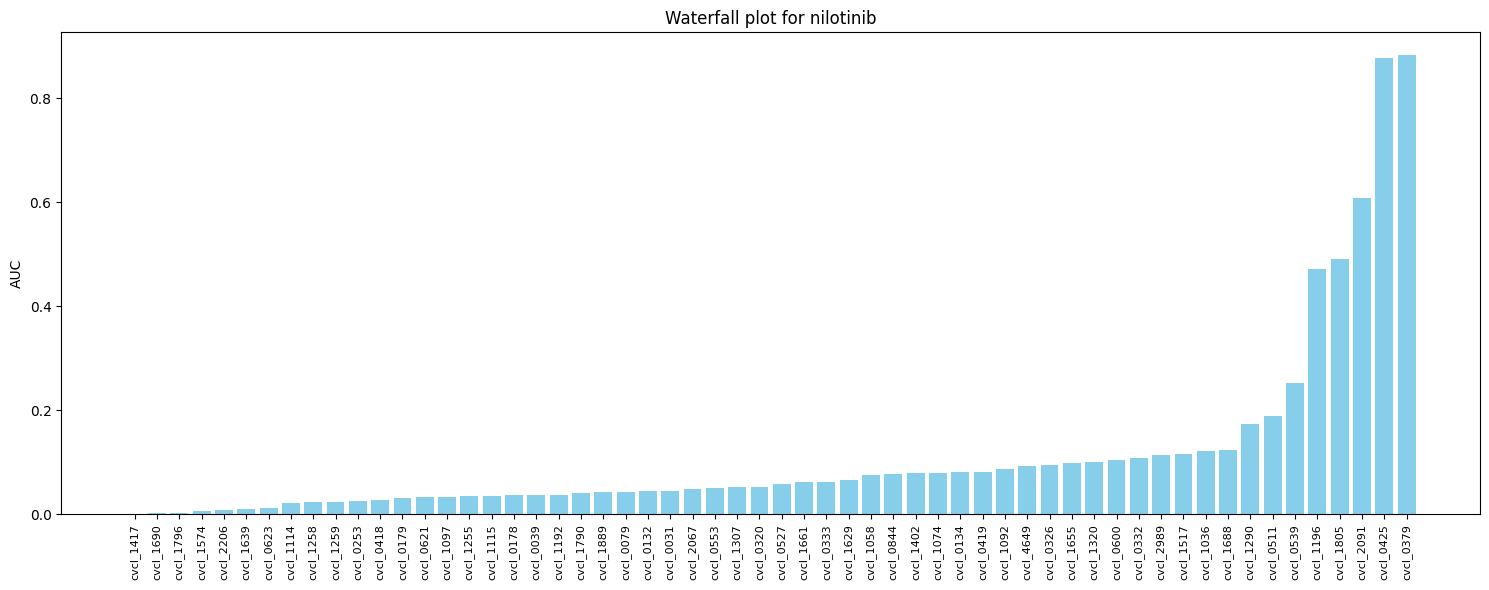

In [19]:
Plotting.plot_waterfall(gdsc.recomp_Aucs, 'nilotinib')

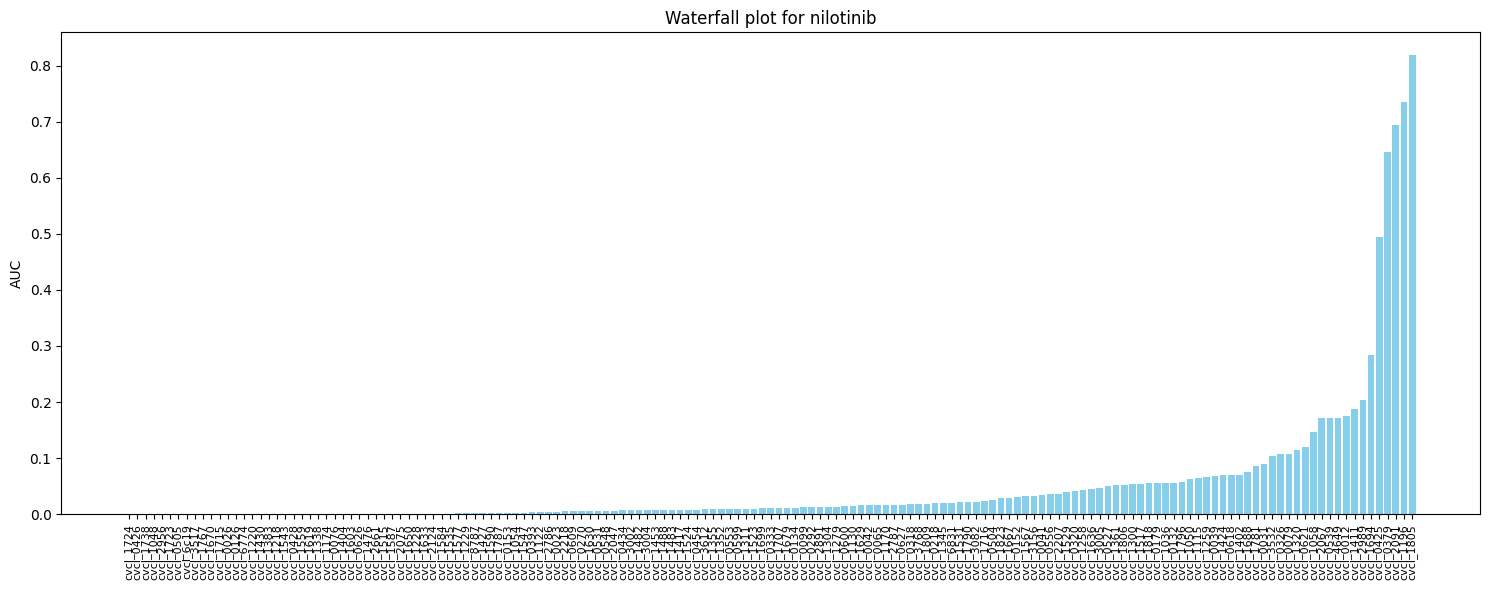

In [20]:
Plotting.plot_waterfall(ccle.recomp_Aucs, 'nilotinib')

Filter the overlapping drug-cell line pairs across published and recomputed datasets so that we can better compare published vs recomputed AUCs.

In [21]:

df_pub1, df_recomp1 = calculations.fetch_data(gdsc)
df_pub2, df_recomp2 = calculations.fetch_data(ccle)

df_pub1.columns= df_pub1.columns.str.lower()
df_pub2.columns= df_pub2.columns.str.lower()


In [22]:

df_pub1_melt = df_pub1.melt(id_vars=['drug'], var_name='cell_line', value_name='auc')
df_pub2_melt = df_pub2.melt(id_vars=['drug'], var_name='cell_line', value_name='auc')
df_recomp1_melt = df_recomp1.melt(id_vars=['drug'], var_name='cell_line', value_name='auc')
df_recomp2_melt = df_recomp2.melt(id_vars=['drug'], var_name='cell_line', value_name='auc')

In [23]:
pub_merged = pd.merge(df_pub1_melt, df_pub2_melt, how = 'inner' , on = ['drug', 'cell_line'], suffixes= ['_pub1', '_pub2']).dropna(subset= ['auc_pub1', 'auc_pub2'])
len(pub_merged['cell_line'].unique())

98

In [24]:
recomp_merged = pd.merge(df_recomp1_melt, df_recomp2_melt, how = 'inner' , on = ['drug', 'cell_line'], suffixes= ['_recomp1', '_recomp2']).dropna(subset= ['auc_recomp1', 'auc_recomp2'])
len(recomp_merged['cell_line'].unique())

353

In [25]:
all_merged = pd.merge(pub_merged, recomp_merged, how= 'inner', on= ['drug', 'cell_line'])
all_merged

,drug,cell_line,auc_pub1,auc_pub2,auc_recomp1,auc_recomp2
0,paclitaxel,cvcl_0080,0.163444,0.882500,0.463830,0.561338
1,crizotinib,cvcl_0080,0.175060,0.185537,0.146807,0.112896
2,topotecan,cvcl_0080,0.525985,0.678750,0.523730,0.594335
3,crizotinib,cvcl_0036,0.062941,0.003138,0.048771,0.081592
4,irinotecan,cvcl_0036,0.090472,0.370700,0.055602,0.395621
...,...,...,...,...,...,...
357,crizotinib,cvcl_6774,0.120988,0.055262,0.095916,0.007424
358,sorafenib,cvcl_6774,0.432562,0.159250,0.360244,0.122288
359,irinotecan,cvcl_6774,0.162433,0.468288,0.100745,0.529741
360,lapatinib,cvcl_6774,0.069343,0.042076,0.001189,0.058184


I will calculate variance (difference) between published AUC values and create a heatmap. So that I can see which drug-cell line pairs are differing (inconsistent) most for their AUC values

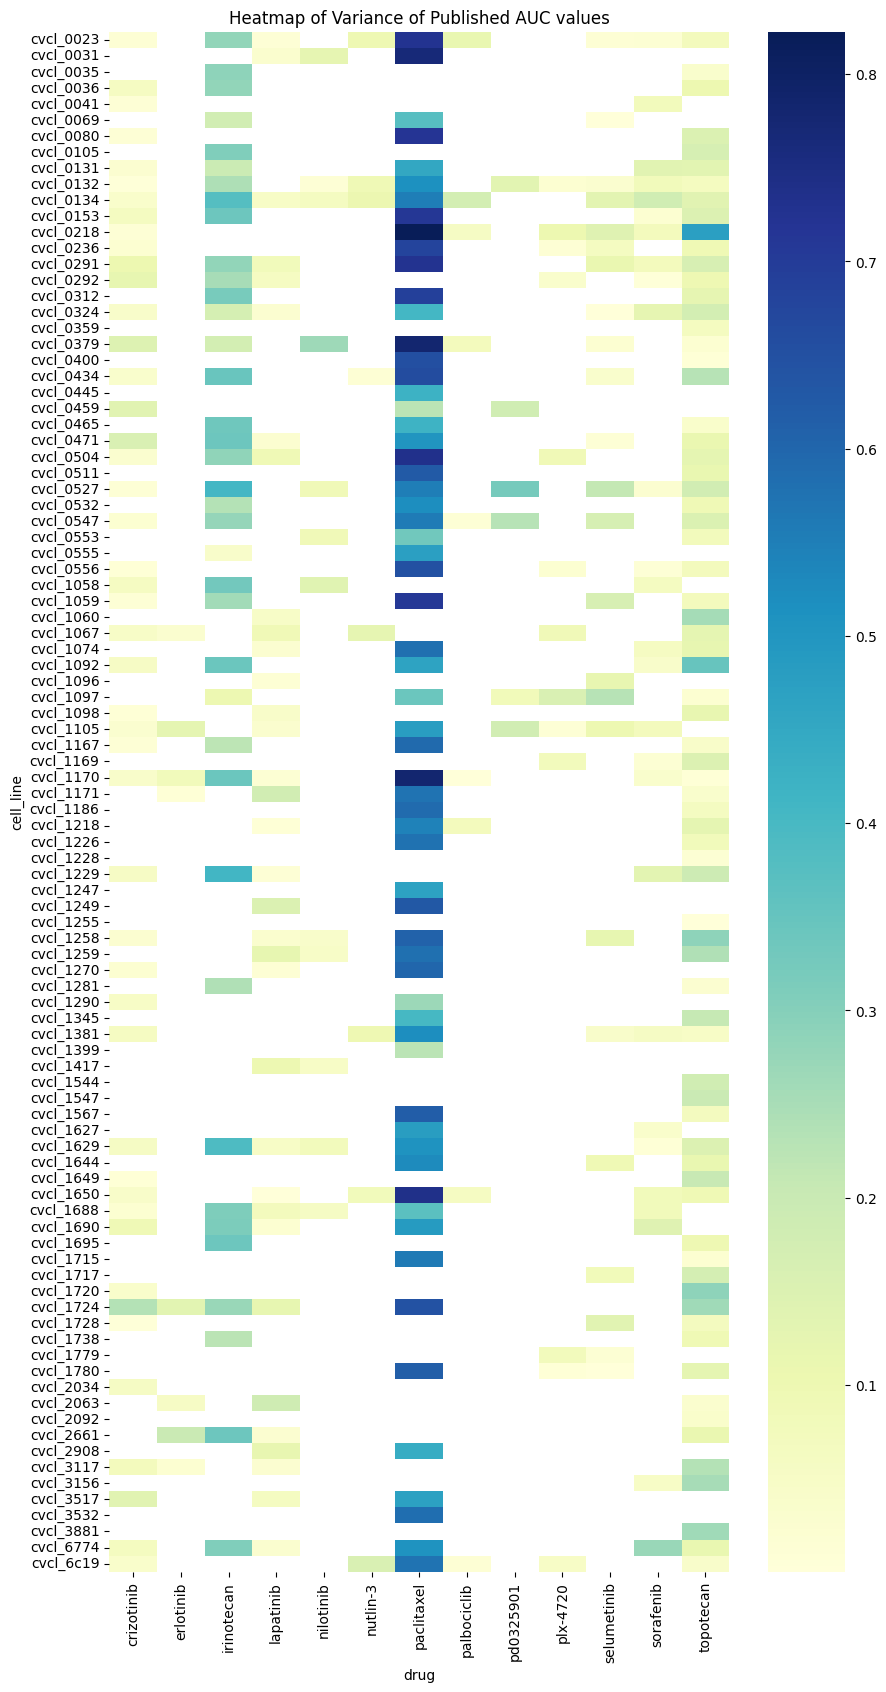

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df = all_merged.copy()


df['abs_diff_pub'] = abs(df['auc_pub1'] - df['auc_pub2'])
df['abs_diff_recomp'] = abs(df['auc_recomp1'] - df['auc_recomp2'])

# Pivot the DataFrame to prepare for the heatmap
df_pivot = df.pivot_table(values='abs_diff_pub', index='cell_line', columns='drug')



plt.figure(figsize=(10, 20))
sns.heatmap(df_pivot, annot=False, cmap="YlGnBu")
plt.title('Heatmap of Variance of Published AUC values')
plt.show()



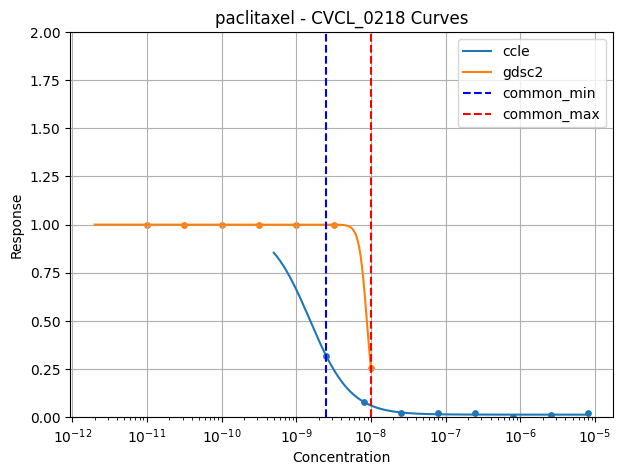

In [27]:
Plotting.plot_sigmoid_curves(ccle, gdsc, 'paclitaxel', 'CVCL_0218', common_conc= common_conc)

It looks like main reason why Published AUC values does not correlate (at least for paclitaxel) is because of the difference between measured dose range.

Do the same for Recomputed ones.

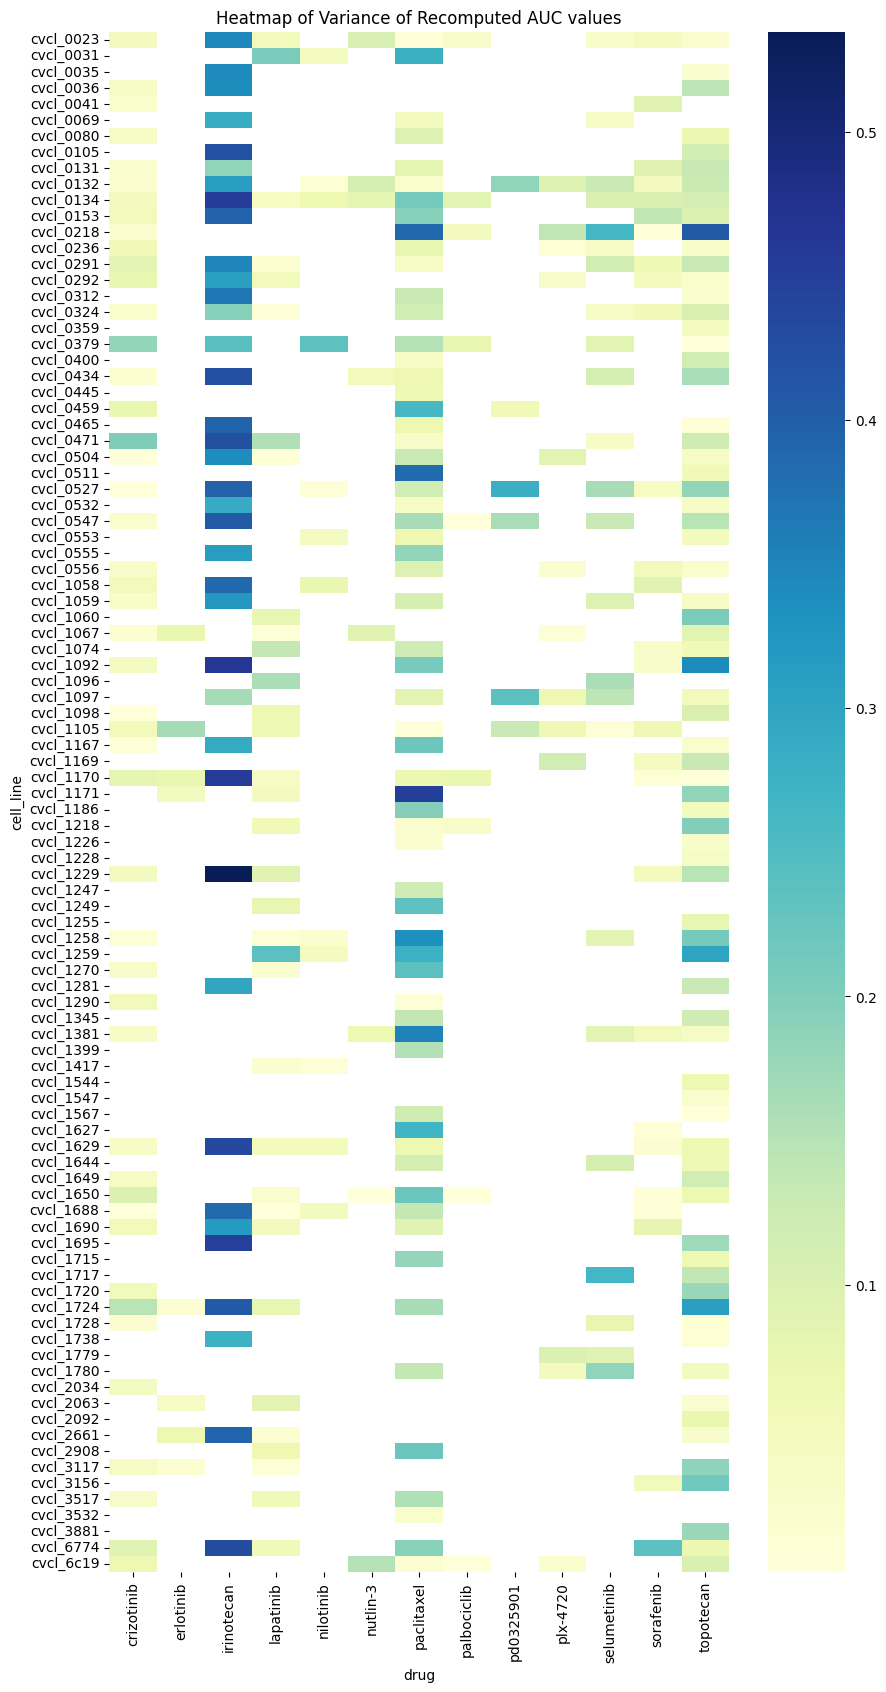

In [28]:
# Pivot the DataFrame to prepare for the heatmap
df_pivot = df.pivot_table(values='abs_diff_recomp', index='cell_line', columns='drug')



plt.figure(figsize=(10, 20))
sns.heatmap(df_pivot, annot=False, cmap="YlGnBu")
plt.title('Heatmap of Variance of Recomputed AUC values')
plt.show()

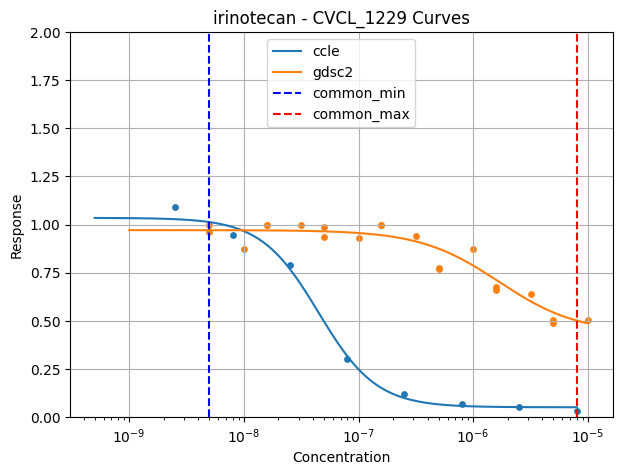

In [29]:
import numpy as np

#Plotting.plot_sigmoid_curve(-7.18, 1.63, 0.997, 0.0245, 0.0025, 8)

Plotting.plot_sigmoid_curves(ccle, gdsc, 'irinotecan', 'CVCL_1229', common_conc= common_conc)



C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\191479222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irinotecan['abs_diff_recomp'] = abs(irinotecan['auc_recomp1'] - irinotecan['auc_recomp2'])
C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\191479222.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cell_lines = irinotecan['cell_line'][:19]


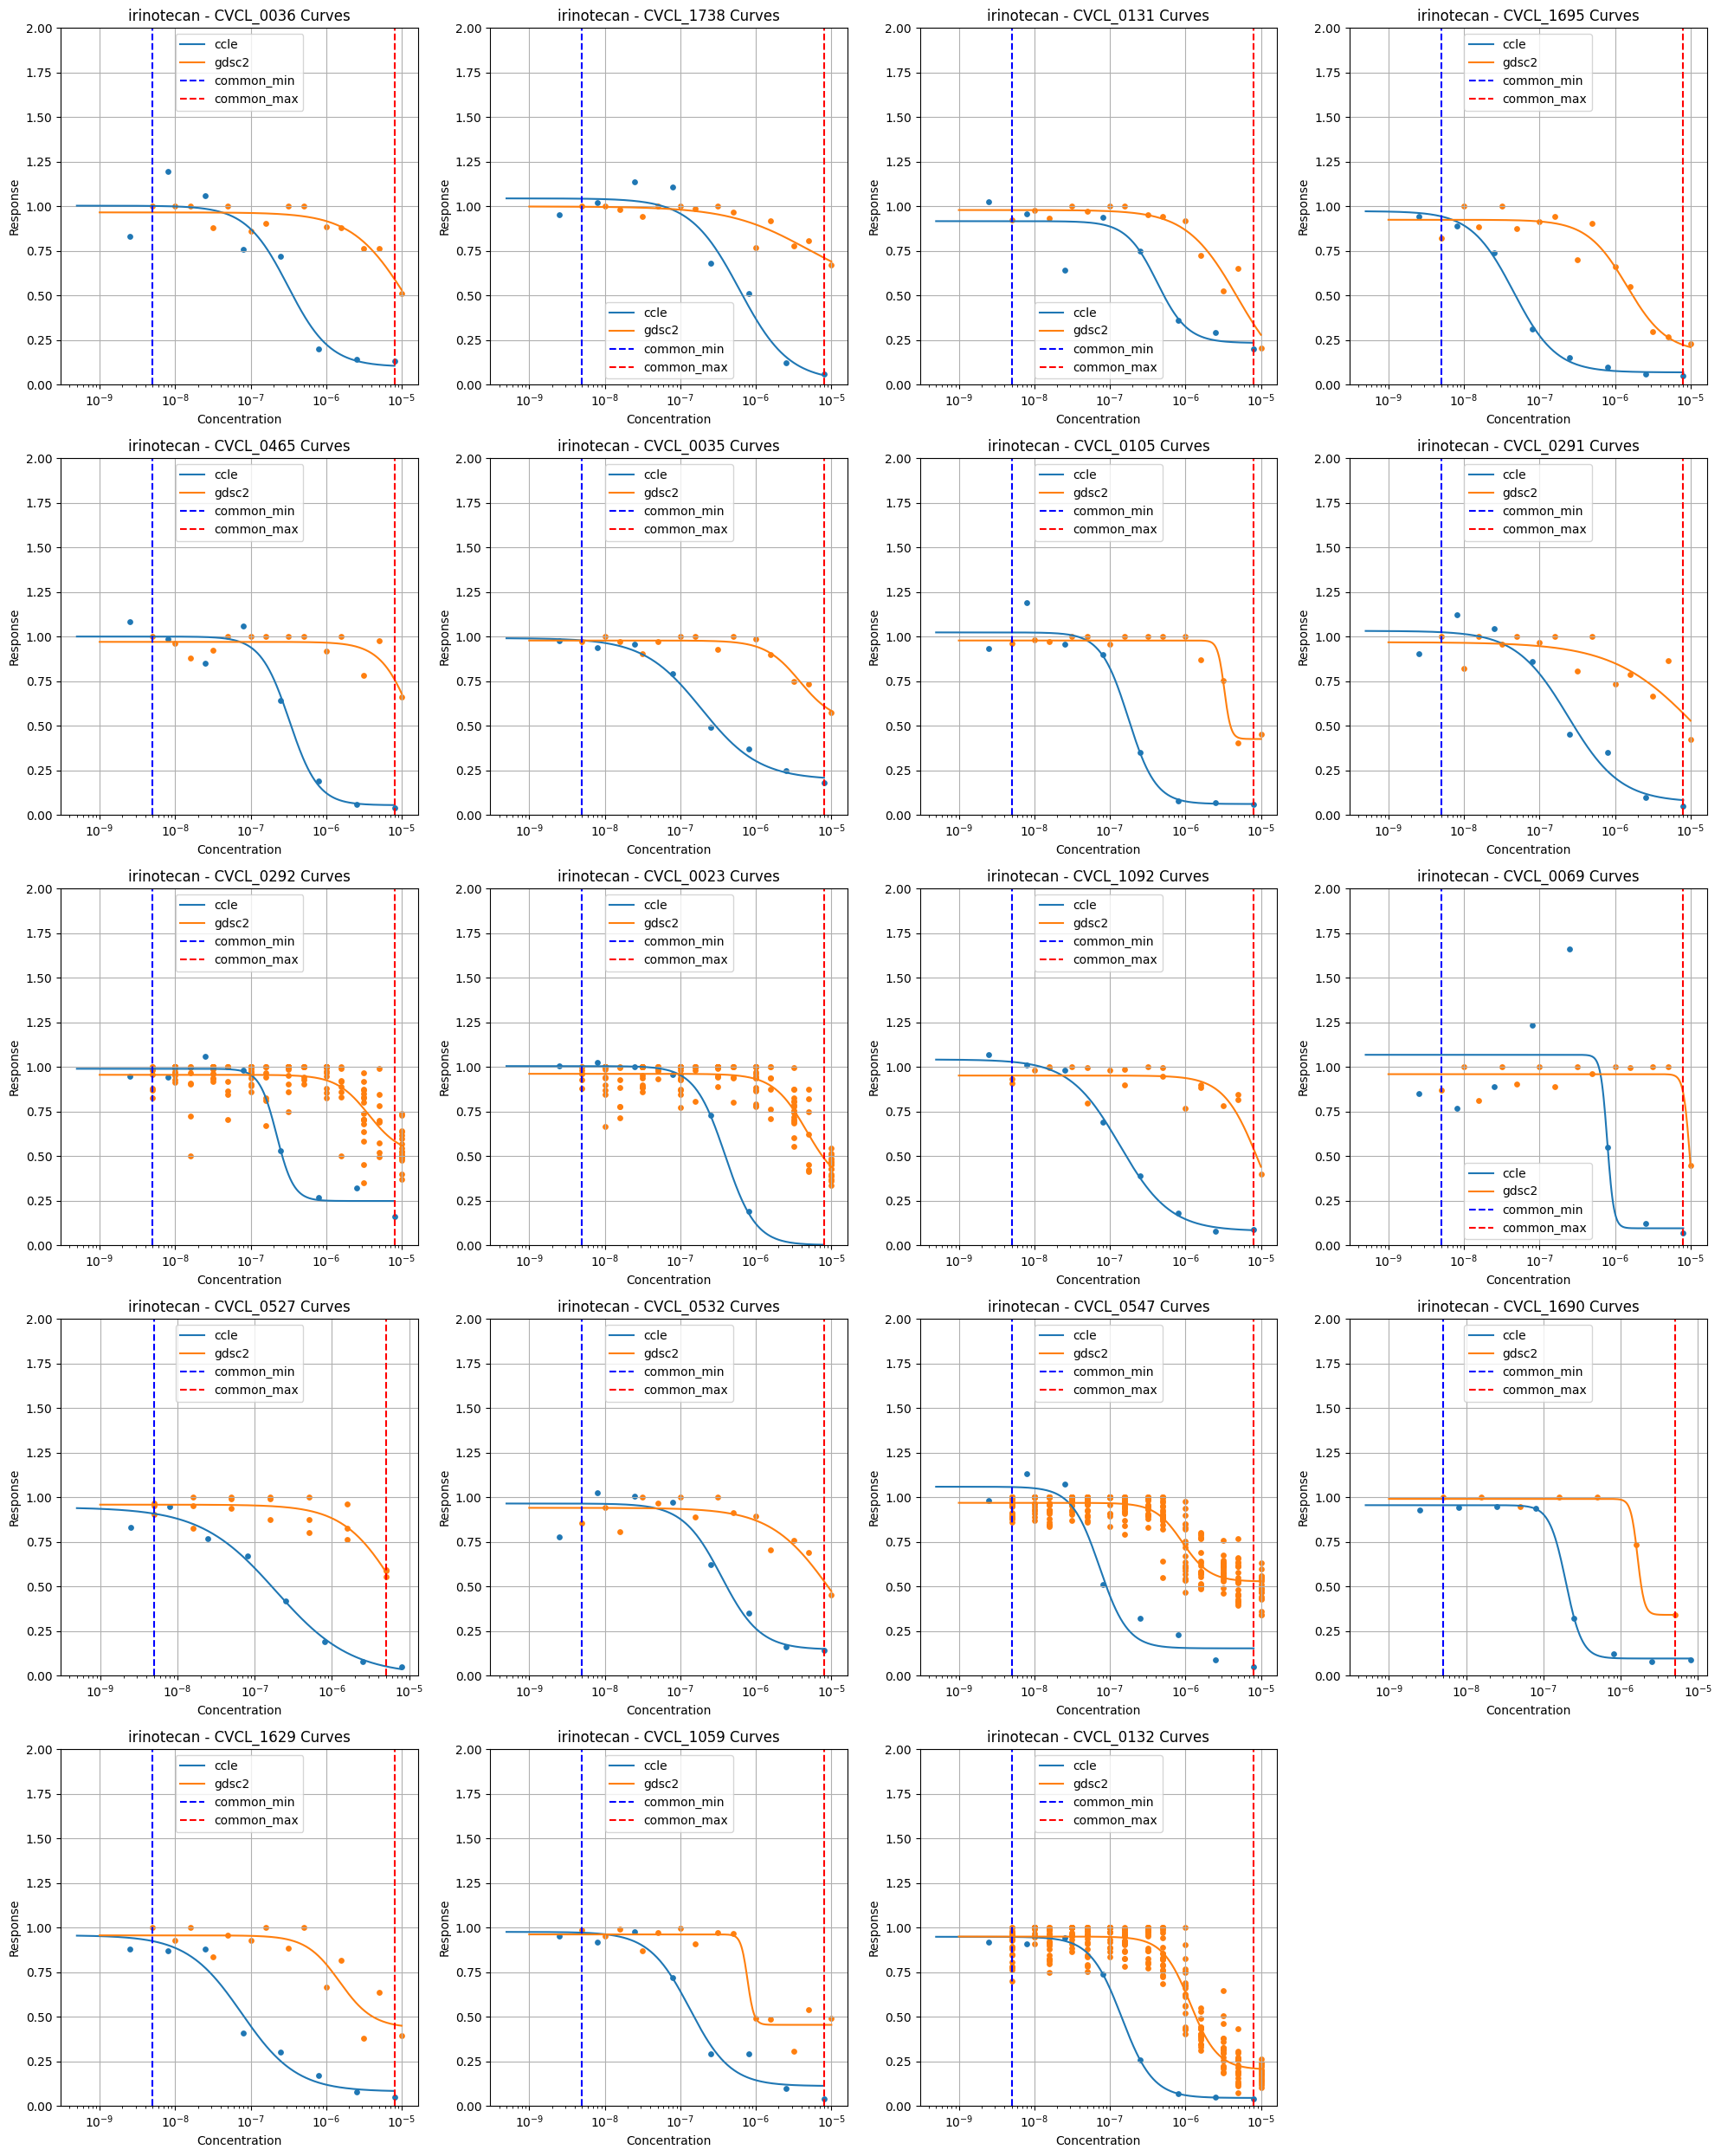

In [30]:
irinotecan = all_merged[all_merged['drug'] == 'irinotecan']

irinotecan['abs_diff_recomp'] = abs(irinotecan['auc_recomp1'] - irinotecan['auc_recomp2'])
irinotecan.sort_values(by= 'abs_diff_recomp', ascending=False)
cell_lines = irinotecan['cell_line'][:19]

num_plots = 20
num_cols = 4  # We will arrange the plots in 4 columns.
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 25))

for i, cell in enumerate(cell_lines):
    ax = axs[i // num_cols, i % num_cols]
    Plotting.multiple_sigmoid_curves(ccle, gdsc, 'irinotecan', cell.upper(), common_conc=common_conc, ax=ax)

# Hide any unused subplots
for i in range(len(cell_lines), num_plots):
    axs[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()  # optional, it increases space between plots
plt.show()


C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\1459939920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paclitaxel['abs_diff_recomp'] = abs(paclitaxel['auc_recomp1'] - paclitaxel['auc_recomp2'])
C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\1459939920.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cell_lines = paclitaxel['cell_line'][:19]


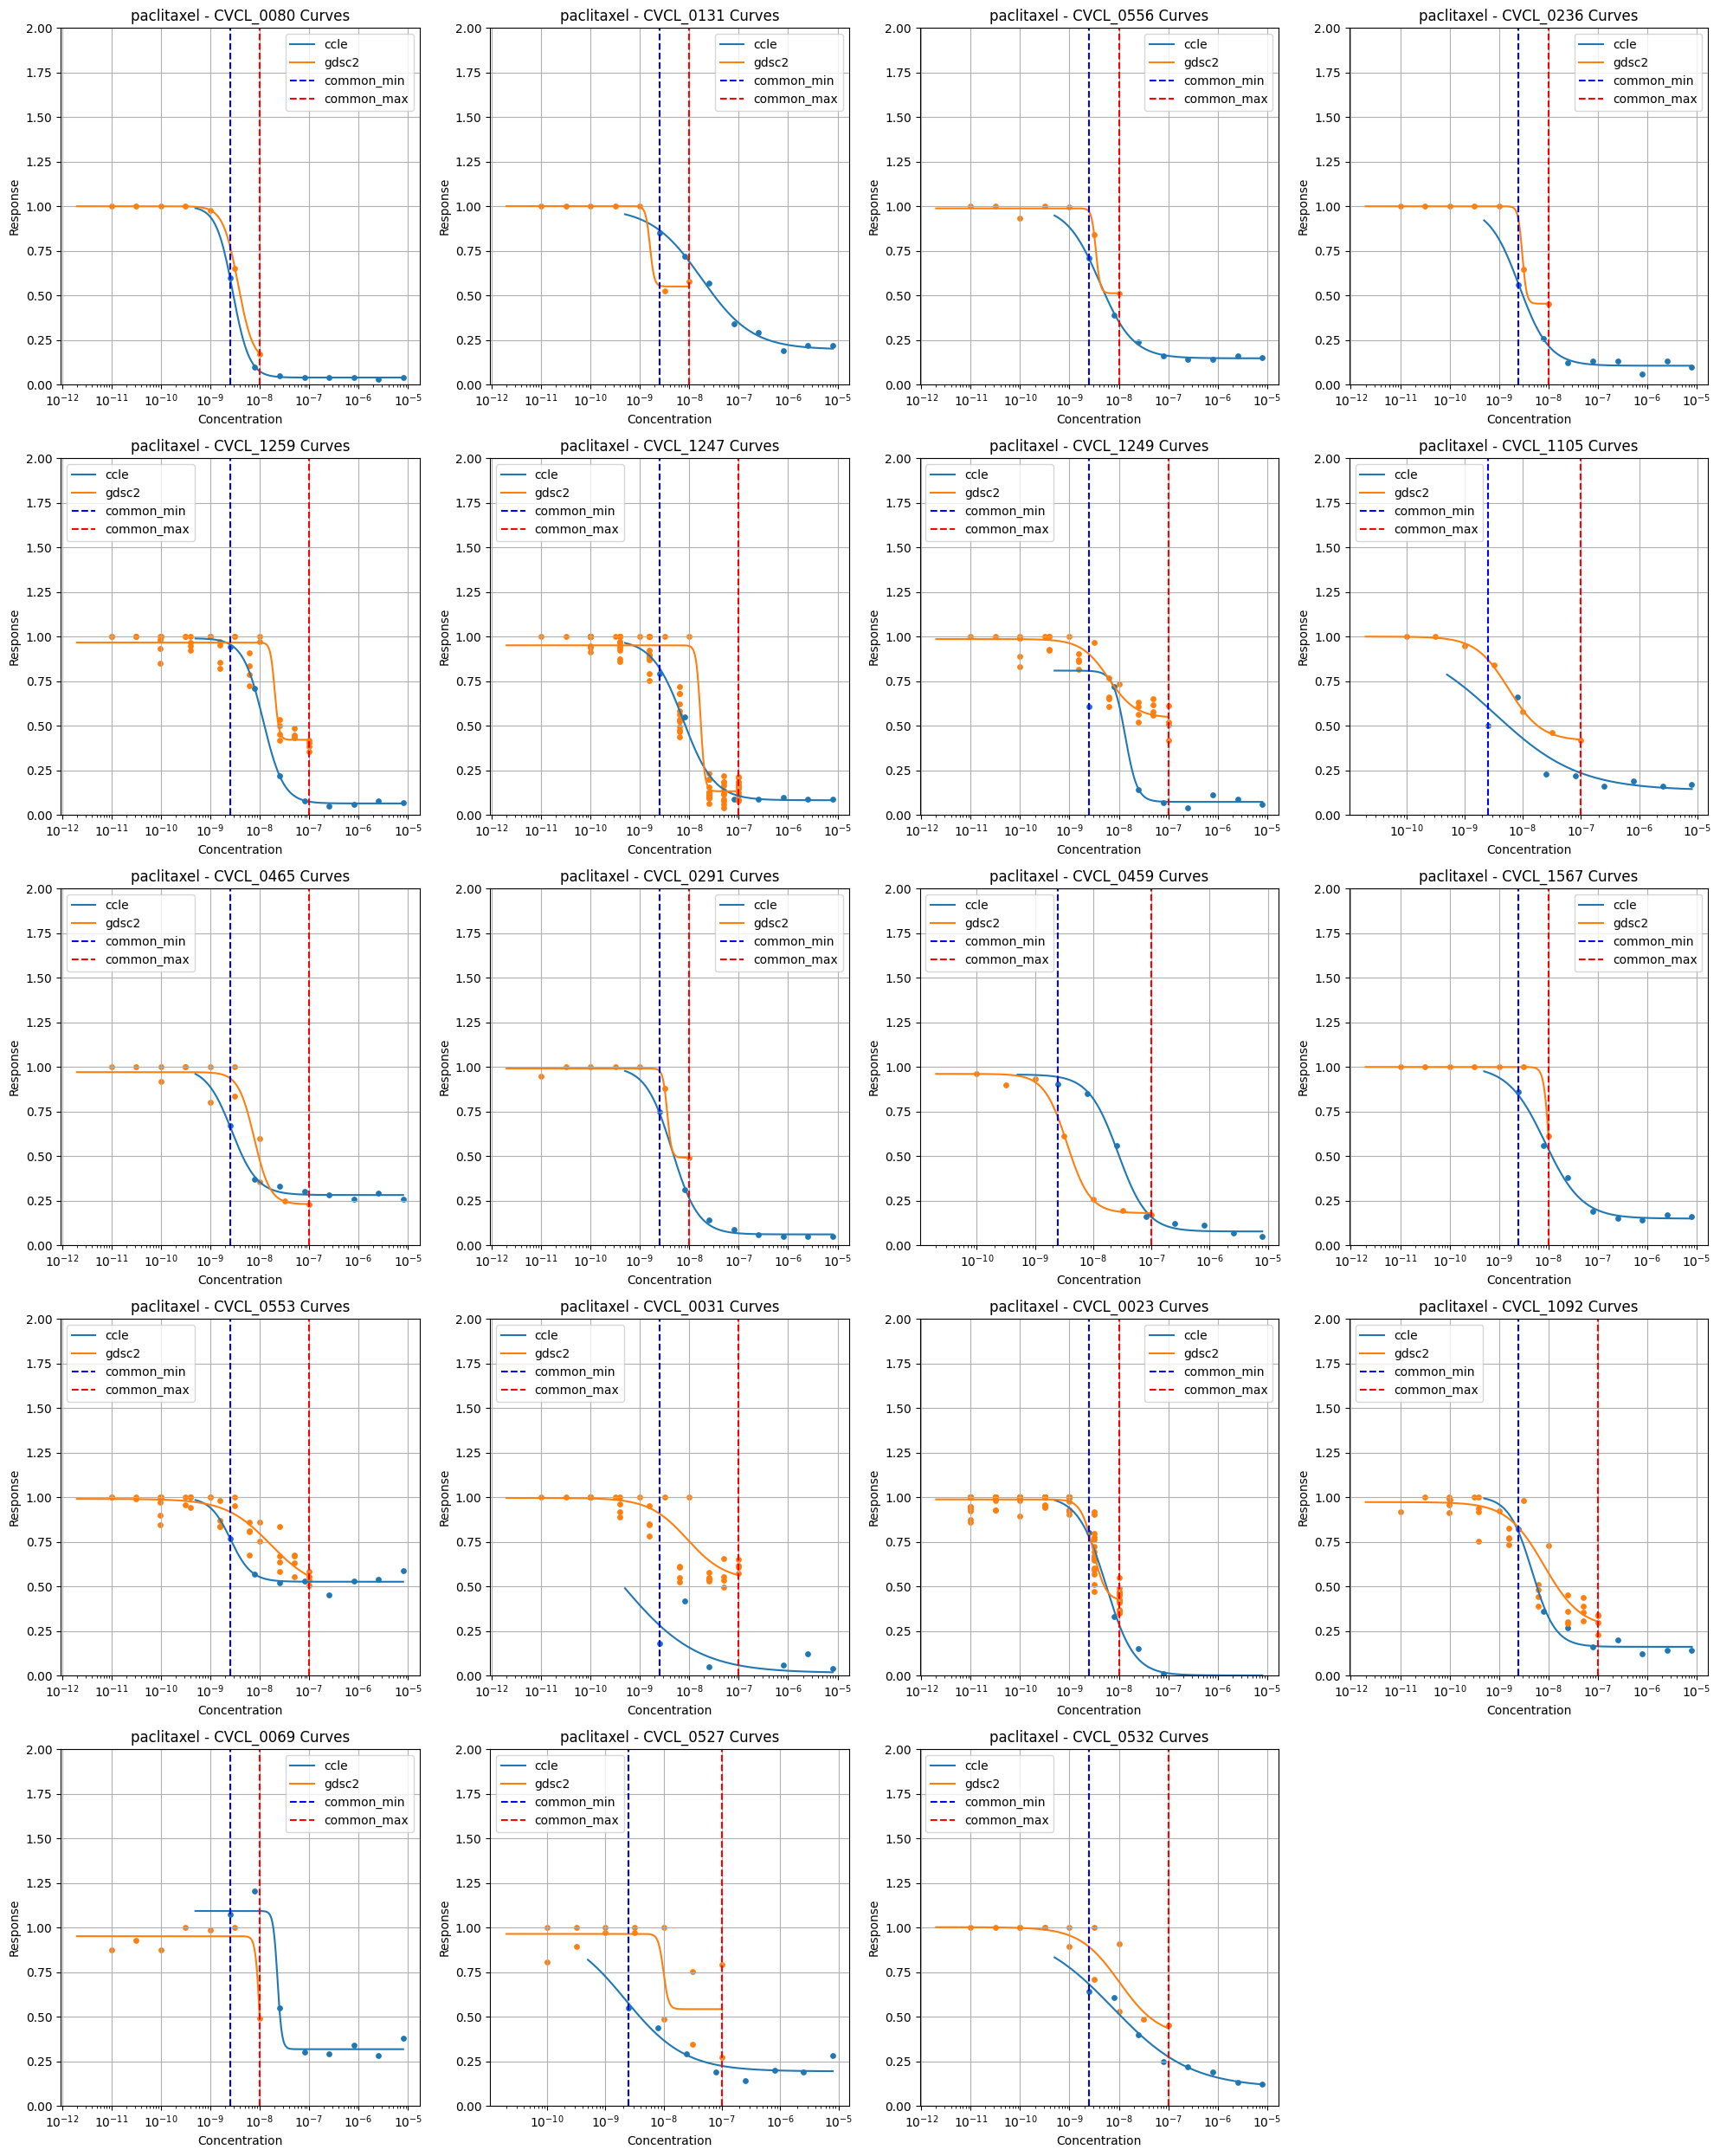

In [31]:
paclitaxel = all_merged[all_merged['drug'] == 'paclitaxel']

paclitaxel['abs_diff_recomp'] = abs(paclitaxel['auc_recomp1'] - paclitaxel['auc_recomp2'])
paclitaxel.sort_values(by= 'abs_diff_recomp', ascending=False)
cell_lines = paclitaxel['cell_line'][:19]

num_plots = 20
num_cols = 4  # We will arrange the plots in 4 columns.
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 25))

for i, cell in enumerate(cell_lines):
    ax = axs[i // num_cols, i % num_cols]
    Plotting.multiple_sigmoid_curves(ccle, gdsc, 'paclitaxel', cell.upper(), common_conc=common_conc, ax=ax)

# Hide any unused subplots
for i in range(len(cell_lines), num_plots):
    axs[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()  # optional, it increases space between plots
plt.show()

C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\1500586511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palbociclib['abs_diff_recomp'] = abs(palbociclib['auc_recomp1'] - palbociclib['auc_recomp2'])
C:\Users\sbeyaz\AppData\Local\Temp\ipykernel_22276\1500586511.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cell_lines = palbociclib['cell_line'][:19]


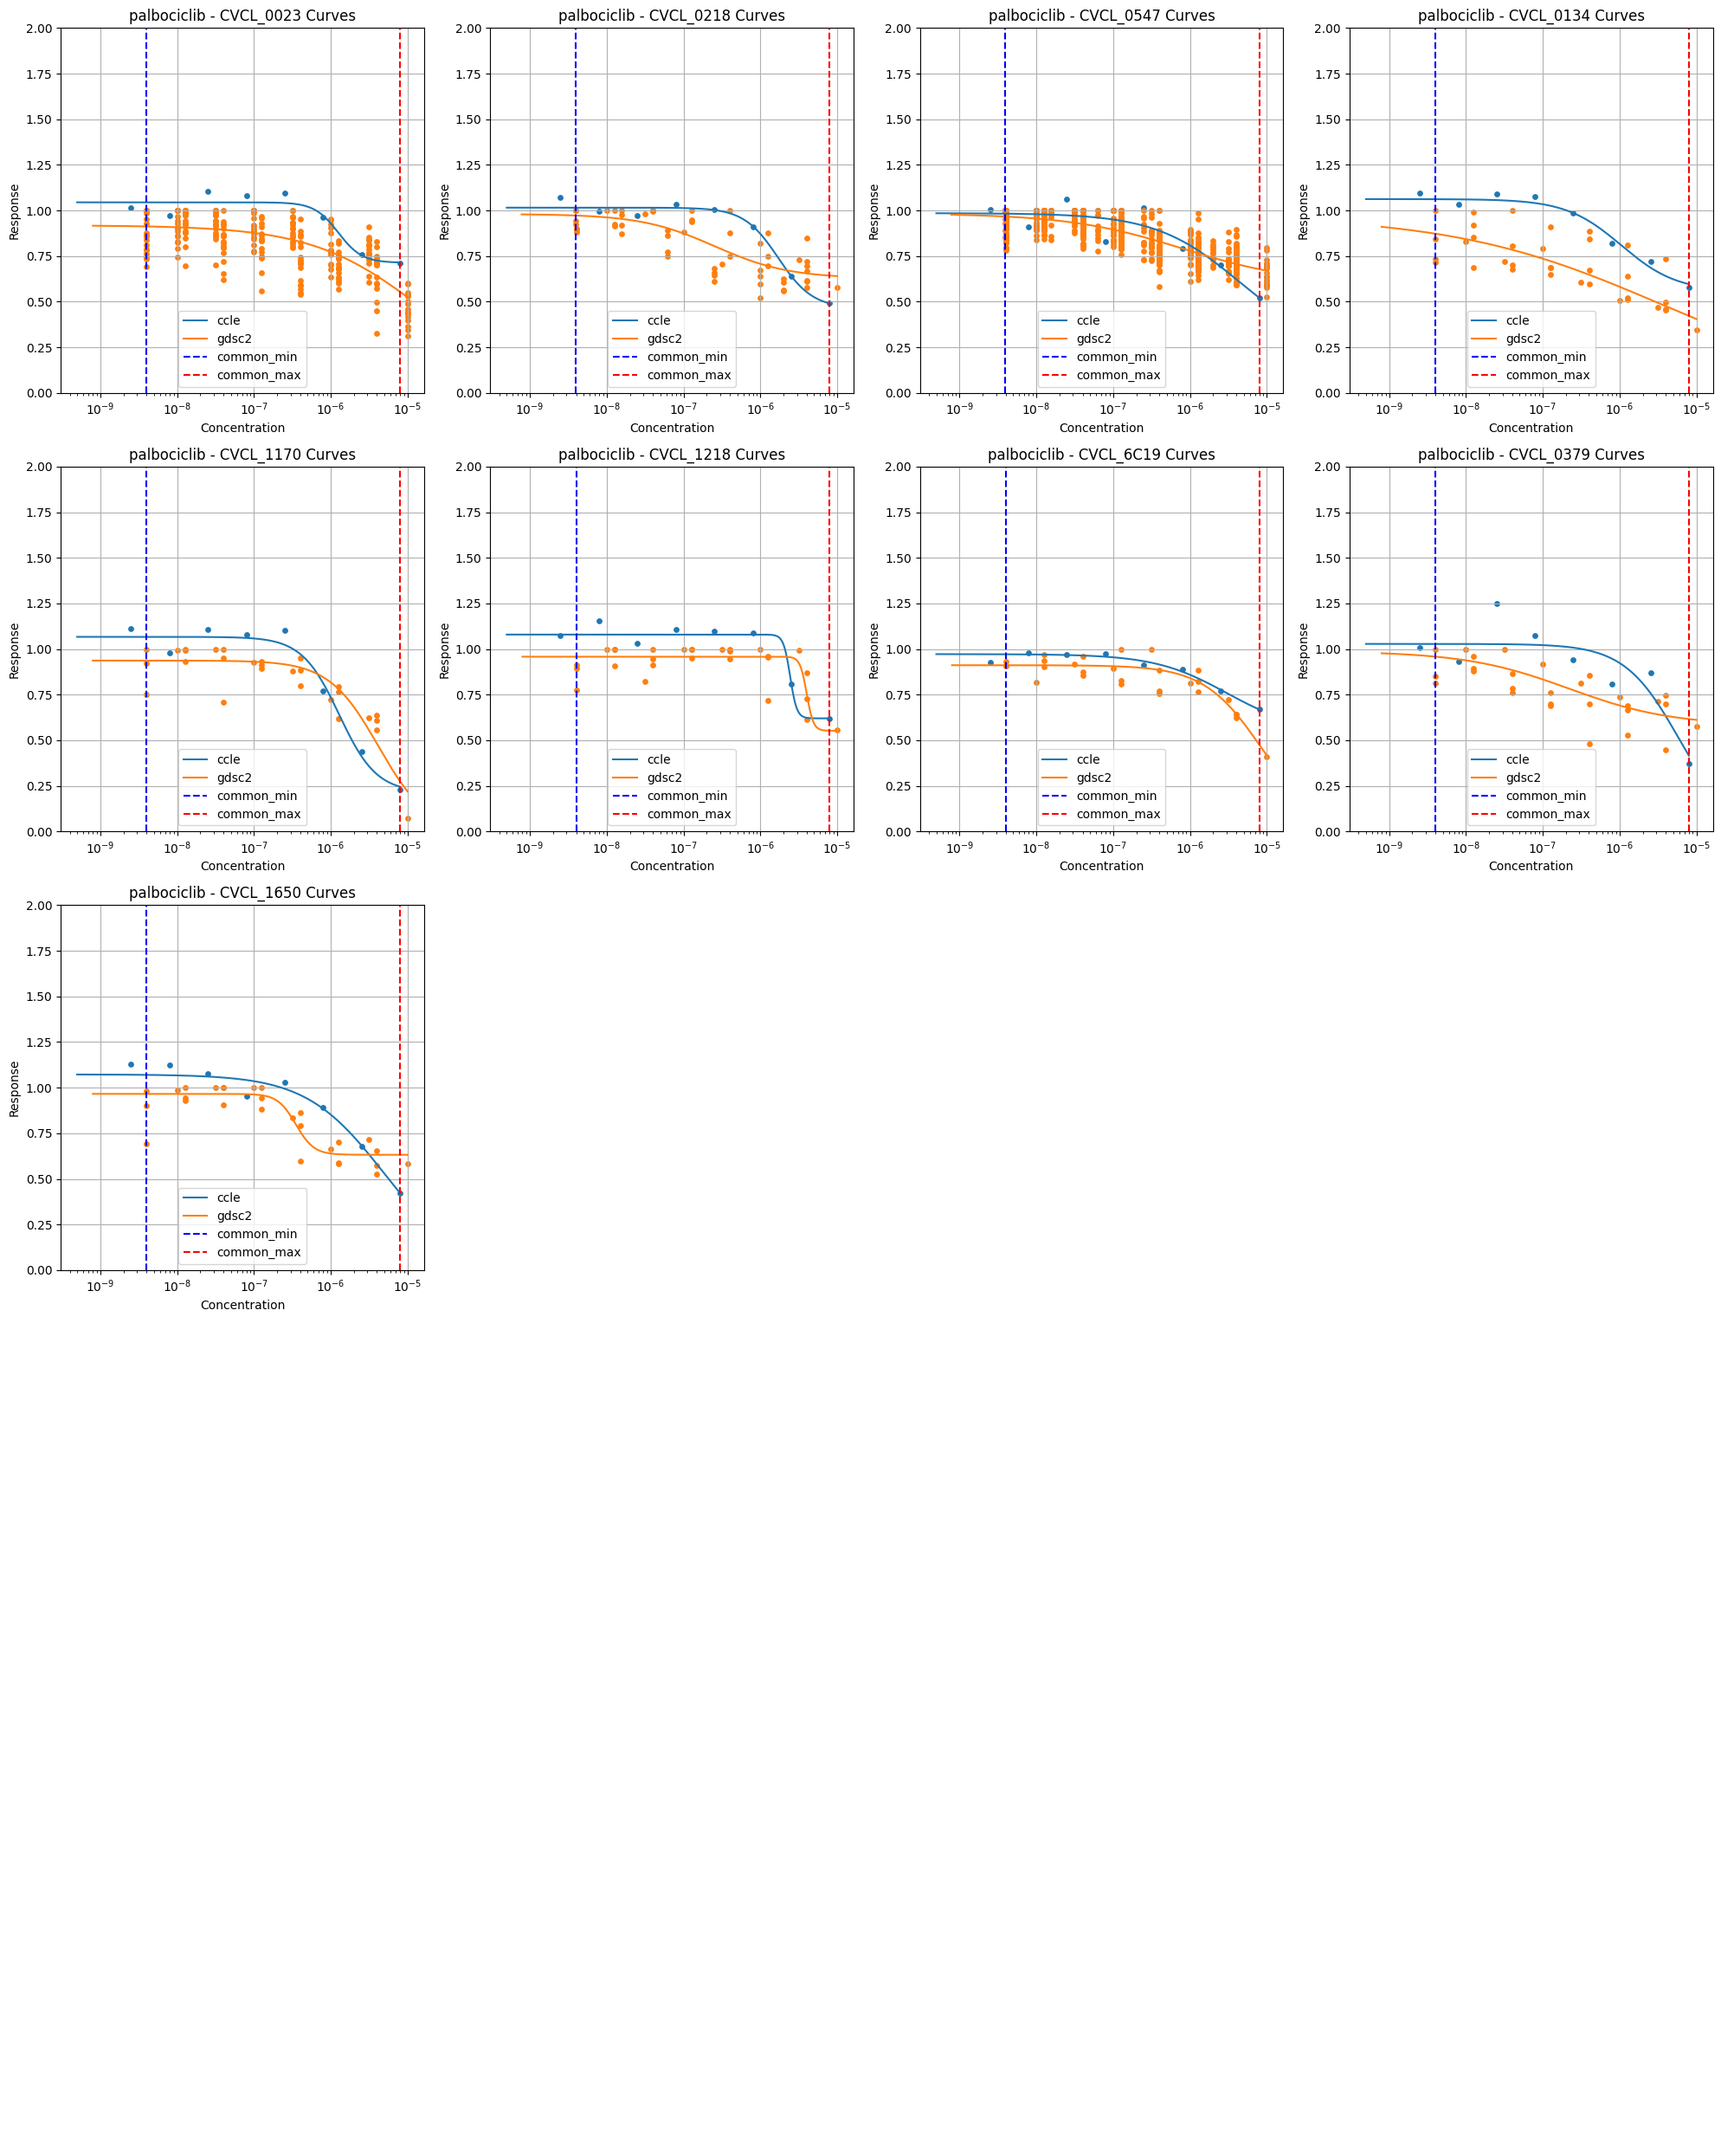

In [32]:
palbociclib = all_merged[all_merged['drug'] == 'palbociclib']

palbociclib['abs_diff_recomp'] = abs(palbociclib['auc_recomp1'] - palbociclib['auc_recomp2'])
palbociclib.sort_values(by= 'abs_diff_recomp', ascending=False)
cell_lines = palbociclib['cell_line'][:19]

num_plots = 20
num_cols = 4  # We will arrange the plots in 4 columns.
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 25))

for i, cell in enumerate(cell_lines):
    ax = axs[i // num_cols, i % num_cols]
    Plotting.multiple_sigmoid_curves(ccle, gdsc, 'palbociclib', cell.upper(), common_conc=common_conc, ax=ax)

# Hide any unused subplots
for i in range(len(cell_lines), num_plots):
    axs[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()  # optional, it increases space between plots
plt.show()

In [33]:
def apply_compute_ABC(row, pSet1, pSet2):
    return Tools.compute_ABC(pSet1, pSet2, row['drug'], row['cell_line'], common_conc)

recomp_df = recomp_merged.copy() 

recomp_df['ABC'] = recomp_df.apply(apply_compute_ABC, args=(ccle, gdsc), axis=1)

sorted_ABC = recomp_df.sort_values(by = 'ABC', ascending= False)

sorted_ABC


,drug,cell_line,auc_recomp1,auc_recomp2,ABC
306,paclitaxel,cvcl_0218,0.116565,0.504732,0.724886
4089,paclitaxel,cvcl_1818,0.056999,0.190757,0.690144
176,paclitaxel,cvcl_0077,0.057515,0.455321,0.625778
3257,paclitaxel,cvcl_1823,0.092776,0.594915,0.595331
2879,plx-4720,cvcl_1694,0.148596,0.687441,0.584298
...,...,...,...,...,...
1134,lapatinib,cvcl_1087,0.048472,0.055581,0.018997
1885,crizotinib,cvcl_1361,0.049816,0.043522,0.017840
877,plx-4720,cvcl_0556,0.024324,0.041510,0.017106
1986,sorafenib,cvcl_1402,0.078335,0.073195,0.011869


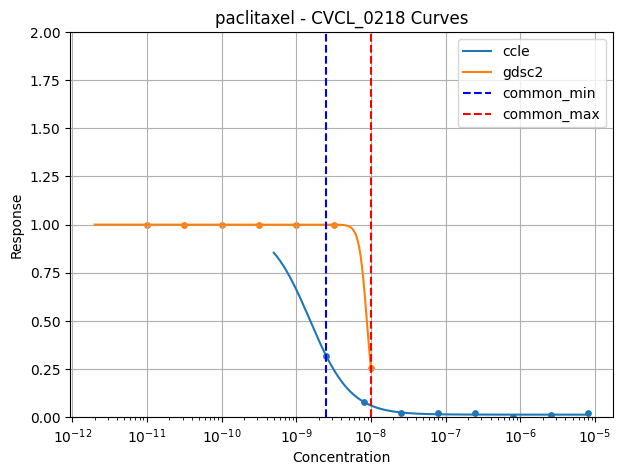

In [34]:
sorted_ABC = recomp_df.sort_values(by = 'ABC', ascending= False)

Plotting.plot_sigmoid_curves(ccle, gdsc, 'paclitaxel', 'CVCL_0218', common_conc)

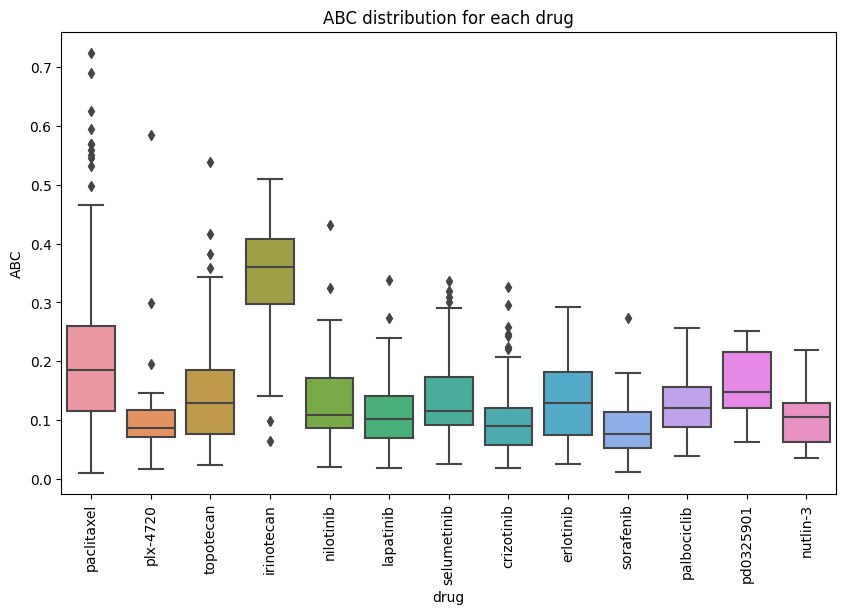

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='drug', y='ABC', data=sorted_ABC)
plt.xticks(rotation=90)
plt.title('ABC distribution for each drug')
plt.show()

In [36]:
seeding_table = pd.read_csv("../gdsc2_seeding_density.csv")
seeding_table['cell_line'] = seeding_table['cell_line'].str.lower()

ABC_seeds = pd.merge(sorted_ABC, seeding_table, on=['cell_line', 'drug'], how= 'left')
ABC_seeds['density_ccle'] = 250

ABC_seeds

,drug,cell_line,auc_recomp1,auc_recomp2,ABC,SEEDING_DENSITY,density_ccle
0,paclitaxel,cvcl_0218,0.116565,0.504732,0.724886,700.0,250
1,paclitaxel,cvcl_1818,0.056999,0.190757,0.690144,2000.0,250
2,paclitaxel,cvcl_0077,0.057515,0.455321,0.625778,300.0,250
3,paclitaxel,cvcl_1823,0.092776,0.594915,0.595331,2500.0,250
4,plx-4720,cvcl_1694,0.148596,0.687441,0.584298,625.0,250
...,...,...,...,...,...,...,...
1260,lapatinib,cvcl_1087,0.048472,0.055581,0.018997,625.0,250
1261,crizotinib,cvcl_1361,0.049816,0.043522,0.017840,400.0,250
1262,plx-4720,cvcl_0556,0.024324,0.041510,0.017106,137.5,250
1263,sorafenib,cvcl_1402,0.078335,0.073195,0.011869,300.0,250


In [37]:
ccle_expression = pd.read_csv("../CCLe_expression_count-matrix.csv", index_col=0)
gdsc_expression = pd.read_csv("../GDSC2_expression_count-matrix.csv", index_col=0)

In [38]:
ccle_expression.head()
gdsc_expression.head()

,CVCL_0218,CVCL_0291,CVCL_0320,CVCL_1311,CVCL_0504,CVCL_5031,CVCL_5044,CVCL_5058,CVCL_1708,CVCL_1247,...,CVCL_1871,CVCL_1870,CVCL_0401,CVCL_2765,CVCL_2416,CVCL_1099,CVCL_1989,CVCL_1040,CVCL_1545,CVCL_3567
TSPAN6,7.068091,7.567510,7.354416,6.666097,7.044279,7.245454,8.779561,8.584940,10.314286,9.012194,...,3.719718,3.363823,7.652445,7.636059,8.132950,3.391213,8.890145,7.288061,6.542976,8.087337
TNMD,2.711452,2.780331,2.904234,2.674573,2.913549,2.896462,2.966783,2.776926,3.333228,2.949849,...,2.842448,2.916597,2.676371,2.616861,2.786121,2.827862,3.984019,2.922512,2.725074,2.519523
DPM1,10.366602,10.142628,10.404940,9.947170,10.593334,9.741617,10.289176,9.770002,10.810695,9.346495,...,10.389342,10.076739,10.377845,9.813502,10.119577,10.768598,9.906810,9.164292,10.153686,10.794489
SCYL3,5.312489,4.160672,4.825913,3.418023,3.681836,4.292103,4.089686,5.715959,5.668452,4.980496,...,5.095654,4.744802,3.918487,3.921414,3.757556,4.927562,3.666218,4.099015,3.977566,4.440530
C1orf112,3.354226,3.299667,3.276544,3.012762,3.348399,3.426980,3.385389,4.460420,3.220402,4.120836,...,3.558213,3.387089,3.887286,3.303692,3.180374,3.117633,3.443743,3.183865,3.103469,3.071894
